In [1]:
!pip install numpy pandas matplotlib seaborn plotly --quiet
!pip install yahoofinancials --quiet

In [2]:
from datetime import datetime, timedelta
import numpy as np 
import pandas as pd
from yahoofinancials import YahooFinancials

In [3]:
def get_yahoofin_dataframe(ticker, start_date, end_date, frequency):
    '''This function will return Historical pricing data in the form of Pandas DataFrame'''
    yahoo_financials = YahooFinancials(ticker)
    stock_prices = yahoo_financials.get_historical_price_data(start_date, end_date, frequency)
    return pd.DataFrame(stock_prices[ticker]['prices'])

In [4]:
#Variable initialization
start_date = '2000-08-31'
end_date = datetime.now().strftime('%Y-%m-%d')
gold_ticker = 'GC=F'
sp500_ticker = '^GSPC'
print('Start Date    :{} \nEnd Date      :{}\nGold Ticker   :{}\nS&P 500 Ticker:{}'.format(start_date, end_date,gold_ticker, sp500_ticker))

Start Date    :2000-08-31 
End Date      :2022-08-19
Gold Ticker   :GC=F
S&P 500 Ticker:^GSPC


In [5]:
gold_df = get_yahoofin_dataframe(gold_ticker, start_date, end_date, 'daily')
gold_df.head()

,date,high,low,open,close,volume,adjclose,formatted_date
0,967694400,278.299988,274.799988,274.799988,278.299988,0.0,278.299988,2000-08-31
1,967780800,277.000000,277.000000,277.000000,277.000000,0.0,277.000000,2000-09-01
2,968040000,NaN,NaN,NaN,NaN,NaN,NaN,2000-09-04
3,968126400,275.799988,275.799988,275.799988,275.799988,2.0,275.799988,2000-09-05
4,968212800,274.200012,274.200012,274.200012,274.200012,0.0,274.200012,2000-09-06


In [6]:
sp500_df = get_yahoofin_dataframe(sp500_ticker, start_date, end_date, 'daily')
sp500_df.head()

,date,high,low,open,close,volume,adjclose,formatted_date
0,967728600,1525.209961,1502.589966,1502.589966,1517.680054,1056600000,1517.680054,2000-08-31
1,967815000,1530.089966,1515.530029,1517.680054,1520.770020,767700000,1520.770020,2000-09-01
2,968160600,1520.770020,1504.209961,1520.770020,1507.079956,838500000,1507.079956,2000-09-05
3,968247000,1512.609985,1492.119995,1507.079956,1492.250000,995100000,1492.250000,2000-09-06
4,968333400,1505.339966,1492.250000,1492.250000,1502.510010,985500000,1502.510010,2000-09-07


In [7]:
print(gold_df.shape)
print(sp500_df.shape)

(5595, 8)
(5526, 8)


In [8]:
gold_df.drop('date',axis=1, inplace=True)
sp500_df.drop('date',axis=1, inplace=True)

In [9]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595 entries, 0 to 5594
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   high            5511 non-null   float64
 1   low             5511 non-null   float64
 2   open            5511 non-null   float64
 3   close           5511 non-null   float64
 4   volume          5511 non-null   float64
 5   adjclose        5511 non-null   float64
 6   formatted_date  5595 non-null   object 
dtypes: float64(6), object(1)
memory usage: 306.1+ KB


In [10]:
sp500_df.formatted_date = pd.to_datetime(sp500_df.formatted_date)
gold_df.formatted_date = pd.to_datetime(gold_df.formatted_date)

In [11]:
print('Data Type of formatted_date : ',type(sp500_df.formatted_date[0]))

Data Type of formatted_date :  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [12]:
sp500_df.isnull().sum()

high              0
low               0
open              0
close             0
volume            0
adjclose          0
formatted_date    0
dtype: int64

In [13]:
gold_df.isnull().sum()

high              84
low               84
open              84
close             84
volume            84
adjclose          84
formatted_date     0
dtype: int64

In [14]:
gold_df[gold_df.high.isna()]

,high,low,open,close,volume,adjclose,formatted_date
2,NaN,NaN,NaN,NaN,NaN,NaN,2000-09-04
60,NaN,NaN,NaN,NaN,NaN,NaN,2000-11-23
61,NaN,NaN,NaN,NaN,NaN,NaN,2000-11-24
82,NaN,NaN,NaN,NaN,NaN,NaN,2000-12-25
87,NaN,NaN,NaN,NaN,NaN,NaN,2001-01-01
...,...,...,...,...,...,...,...
3952,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-15
4443,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-29
5536,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-30
5551,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-20


In [15]:
gold_df.fillna(method='ffill',inplace=True)
gold_df.isnull().sum()

high              0
low               0
open              0
close             0
volume            0
adjclose          0
formatted_date    0
dtype: int64

In [16]:
sp500_df.duplicated().sum()
gold_df.duplicated().sum()

0

In [17]:
sp500_df.set_index('formatted_date', inplace=True)
gold_df.set_index('formatted_date', inplace=True)
sp500_df.sort_index(inplace=True)
gold_df.sort_index(inplace=True)

In [18]:
sp500_df['asset_class'] = 'S&P 500'
gold_df['asset_class'] = 'Gold'

In [19]:
sp500_df['year'] = sp500_df.index.year
gold_df['year'] = gold_df.index.year

sp500_df['month'] = sp500_df.index.month
gold_df['month'] = gold_df.index.month

sp500_df['year_month'] = sp500_df.year.map(str) +'-'+ sp500_df.month.map(str)
gold_df['year_month'] = gold_df.year.map(str) +'-'+ gold_df.month.map(str)

In [20]:
sp500_df.sample(5)

,high,low,open,close,volume,adjclose,asset_class,year,month,year_month
formatted_date,,,,,,,,,,
2002-11-19,905.450012,893.090027,900.359985,896.739990,1337400000,896.739990,S&P 500,2002,11,2002-11
2016-01-14,1934.469971,1878.930054,1891.680054,1921.839966,5241110000,1921.839966,S&P 500,2016,1,2016-1
2001-06-20,1225.609985,1210.069946,1212.579956,1223.140015,1350100000,1223.140015,S&P 500,2001,6,2001-6
2008-04-18,1395.900024,1369.000000,1369.000000,1390.329956,4222380000,1390.329956,S&P 500,2008,4,2008-4
2021-11-12,4688.470215,4650.770020,4655.240234,4682.850098,2865790000,4682.850098,S&P 500,2021,11,2021-11


In [21]:
gold_df.sample(5)

,high,low,open,close,volume,adjclose,asset_class,year,month,year_month
formatted_date,,,,,,,,,,
2006-11-15,622.500000,622.500000,622.500000,622.500000,0.0,622.500000,Gold,2006,11,2006-11
2019-05-24,1283.000000,1283.000000,1283.000000,1283.000000,9.0,1283.000000,Gold,2019,5,2019-5
2004-06-07,394.000000,392.000000,392.600006,393.799988,130.0,393.799988,Gold,2004,6,2004-6
2014-12-02,1212.300049,1191.300049,1212.300049,1199.199951,1236.0,1199.199951,Gold,2014,12,2014-12
2003-01-09,353.299988,353.299988,353.299988,353.299988,2.0,353.299988,Gold,2003,1,2003-1


In [22]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.offline as py
%matplotlib inline

## Default settings
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [23]:
all_df = pd.concat([sp500_df,gold_df])
all_df.sample(5)

,high,low,open,close,volume,adjclose,asset_class,year,month,year_month
formatted_date,,,,,,,,,,
2000-09-12,1496.930054,1479.670044,1489.260010,1481.989990,9.912000e+08,1481.989990,S&P 500,2000,9,2000-9
2005-03-02,433.399994,433.399994,433.399994,432.799988,1.000000e+00,432.799988,Gold,2005,3,2005-3
2006-01-04,1275.369995,1267.739990,1268.800049,1273.459961,2.515330e+09,1273.459961,S&P 500,2006,1,2006-1
2007-10-05,741.700012,731.000000,731.000000,741.299988,6.000000e+00,741.299988,Gold,2007,10,2007-10
2016-04-21,1270.599976,1247.599976,1247.699951,1249.000000,1.240000e+02,1249.000000,Gold,2016,4,2016-4


In [ ]:
fig = px.line(all_df,
              x=all_df.index,
              y=all_df.close,
              color=all_df.asset_class, 
              color_discrete_sequence=["violet", "gold"],
              template = 'plotly_dark',
              title='Historical view of the closing price')

fig.update_layout(xaxis_title='Date', 
                  yaxis_title='Closing Price', 
                  legend_title='Asset Class')
fig.show()

In [24]:
volume_df = all_df[['year_month','asset_class','volume']].groupby(by=['year_month','asset_class']).sum()
volume_df.reset_index(inplace=True);
volume_df.head(5)

,year_month,asset_class,volume
0,2000-10,Gold,3.210000e+02
1,2000-10,S&P 500,2.595140e+10
2,2000-11,Gold,3.246500e+04
3,2000-11,S&P 500,2.053230e+10
4,2000-12,Gold,1.677000e+03


In [ ]:
fig = px.area(volume_df, 
              facet_row = 'asset_class', 
              x = 'year_month', 
              y = 'volume', 
              color = 'asset_class', 
              template = 'plotly_dark',
              color_discrete_sequence=["gold","blue"],
              labels={'asset_class':'Asset Class', }
            )

fig.update_layout(
    title="Volume Gold vs S&P 500",
    legend_title="Asset Class",
  )

fig.update_yaxes(title_text="Volume")
fig.update_xaxes(title_text="Year & Month")
fig.show()

In [25]:
gold_volume_df = volume_df[volume_df.asset_class == 'Gold']
sp500_volume_df = volume_df[volume_df.asset_class == 'S&P 500']

In [ ]:
figure1 = px.area(sp500_volume_df, 
              x = 'year_month', 
              y = 'volume', 
              color_discrete_sequence =['blue'],
             )

figure2 = px.area(gold_volume_df, 
              x = 'year_month', 
              y = 'volume',
              color_discrete_sequence =['gold']
              )
          
fig = make_subplots(rows=2, cols=1,subplot_titles=("S&P 500","Gold")) 

fig.append_trace(figure1["data"][0], row=1, col=1)
fig.append_trace(figure2["data"][0], row=2, col=1)

fig.update_yaxes(title_text="Volume (B)", row=1, col=1)
fig.update_yaxes(title_text="Volume", row=2, col=1)


fig.update_layout(title_text="Volume Trend")       
fig.show()

In [26]:
gold_df.describe()

,high,low,open,close,volume,adjclose,year,month
count,5595.000000,5595.000000,5595.000000,5595.000000,5595.000000,5595.000000,5595.000000,5595.000000
mean,1057.050921,1046.138678,1051.755300,1051.665469,4385.934048,1051.665469,2011.072922,6.532797
std,514.333777,508.038660,511.346879,511.224890,24819.935947,511.224890,6.374952,3.436037
min,256.100006,255.000000,255.000000,255.100006,0.000000,255.100006,2000.000000,1.000000
25%,539.950012,538.850006,539.700012,539.800018,18.000000,539.800018,2006.000000,4.000000
50%,1199.300049,1189.000000,1194.599976,1194.699951,99.000000,1194.699951,2011.000000,7.000000
75%,1394.950012,1378.649963,1387.399963,1387.000000,368.000000,1387.000000,2017.000000,10.000000
max,2072.000000,2040.000000,2053.600098,2051.500000,386334.000000,2051.500000,2022.000000,12.000000


In [27]:
sp500_df.describe()

,high,low,open,close,volume,adjclose,year,month
count,5526.000000,5526.000000,5526.000000,5526.000000,5.526000e+03,5526.000000,5526.000000,5526.000000
mean,1863.692744,1841.201979,1852.912685,1853.149922,3.295045e+09,1853.149922,2011.154542,6.541983
std,954.367688,944.762929,949.775068,949.958124,1.467746e+09,949.958124,6.349575,3.428804
min,695.270020,666.789978,679.280029,676.530029,3.560700e+08,676.530029,2000.000000,1.000000
25%,1181.860046,1165.889984,1173.607544,1173.647491,2.158138e+09,1173.647491,2006.000000,4.000000
50%,1421.604980,1407.265015,1414.065002,1414.069946,3.362485e+09,1414.069946,2011.000000,7.000000
75%,2350.654907,2327.274963,2341.432495,2342.039978,4.059588e+09,2342.039978,2017.000000,10.000000
max,4818.620117,4780.040039,4804.509766,4796.560059,1.145623e+10,4796.560059,2022.000000,12.000000


In [ ]:
trace0 = go.Box(
    y=sp500_df.close,
    name = 'S&P 500',
    marker = dict(
        color = 'red')
)

trace1 = go.Box(
    y=gold_df.close,
    name = 'Gold',
    marker = dict(
        color = 'navy')
)

data = [trace0, trace1]
layout = dict(title='Stock Prices of S&P 500 & Gold')

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [28]:
gold_df['daily_return'] = gold_df.adjclose.pct_change()
sp500_df['daily_return'] = sp500_df.adjclose.pct_change()

#gold_df['log_returns'] = np.log(gold_df['adjclose']/gold_df['adjclose'].shift())
#sp500_df['log_returns'] = np.log(sp500_df['adjclose']/sp500_df['adjclose'].shift())

In [ ]:
trace0 = go.Scatter(
                    x=sp500_df.index, 
                    y=sp500_df.daily_return, 
                    name='S&P 500', 
                    line=dict(color='lime'
                             )
                   )

trace1 = go.Scatter(
                    x=gold_df.index, 
                    y=gold_df.daily_return, 
                    name='Gold', 
                    line=dict(color='grey'
                             )
                   )


data = [trace0, trace1]
layout = dict(
    title='Daily Returns of S&P 500 vs Gold',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=3,
                     label='3m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1Y',
                     step='month',
                     stepmode='backward'),
                dict(count=5,
                     label='5Y',
                     step='year',
                     stepmode='backward'),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible = True
        ), type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [ ]:
all_df = pd.concat([sp500_df,gold_df])
fig = px.histogram(all_df,
              x='daily_return',
              color=all_df.asset_class,
              nbins=150,
              marginal='violin',
              template = 'plotly_dark',
              title='Distribution of Daily Returns')

fig.update_layout(xaxis_title='Daily returns', 
                  yaxis_title='Freq of returns', 
                  legend_title='Asset Class')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
start_covid = '2019-1-1'
end_covid  = '2021-6-30'
downfall = '2020-02-20'
trace0 = go.Candlestick(
                        x=gold_df.index,
                        open=gold_df.open,
                        high=gold_df.high, 
                        low=gold_df.low,
                        close=gold_df.close,
                        name='Gold'
                       )
trace1 = go.Candlestick(
                        x=sp500_df.index,
                        open=sp500_df.open,
                        high=sp500_df.high, 
                        low=sp500_df.low,
                        close=sp500_df.close,
                        name='S&P 500'
                       )
data = [trace0,trace1]
layout =  dict(  title = "Price Chart of Gold & S&P 500",
                 #template = 'plotly_dark',
                 xaxis = dict(range = [start_covid,end_covid]),
                 shapes = [dict(
        x0=downfall, x1=downfall, y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
      annotations=[dict(
        x=downfall, y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Price Declining Begins')]
              )

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [29]:
corr_df = pd.merge(sp500_df, gold_df, left_index=True, right_index=True, how='inner')[['adjclose_x','adjclose_y','daily_return_x','daily_return_y']]
corr_df.columns = ['S&P 500 Price','Gold Price','S&P 500 Returns','Gold Returns']
corr_df.sort_index(inplace=True)
corr_df.head()

,S&P 500 Price,Gold Price,S&P 500 Returns,Gold Returns
formatted_date,,,,
2000-08-31,1517.680054,278.299988,NaN,NaN
2000-09-01,1520.770020,277.000000,0.002036,-0.004671
2000-09-05,1507.079956,275.799988,-0.009002,-0.004332
2000-09-06,1492.250000,274.200012,-0.009840,-0.005801
2000-09-07,1502.510010,274.000000,0.006876,-0.000729


In [30]:
corr_df["S&P 500 Returns"].corr(corr_df["S&P 500 Returns"])

1.0

In [31]:
corr_df["S&P 500 Returns"].corr(corr_df["Gold Returns"])

-0.015203102065186009

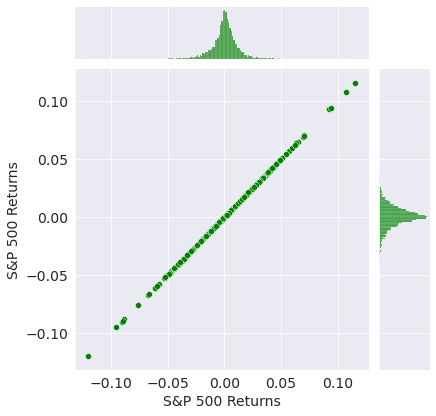

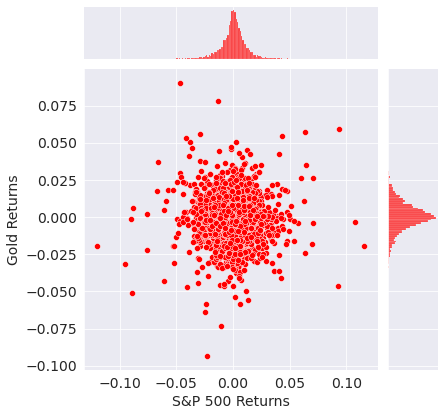

In [32]:
sns.jointplot(data=corr_df,
              x='S&P 500 Returns', 
              y='S&P 500 Returns', 
              kind='scatter',
              color='green')
sns.jointplot(data=corr_df,
              x='S&P 500 Returns', 
              y='Gold Returns', 
              kind='scatter',
              color='red');


In [33]:
#getting rid of first row which has null ruturns 
corr_df = corr_df[1:]
corr_df.sort_index(inplace=True)

In [34]:
corr_df['sp500_cum_ret'] = ((1 + corr_df["S&P 500 Returns"]).cumprod() - 1)*100
corr_df['gold_cum_ret'] = ((1 + corr_df["Gold Returns"]).cumprod() - 1)*100

In [35]:
sp_growth = round(corr_df["sp500_cum_ret"].iloc[-1],2)
gold_growth = round(corr_df["gold_cum_ret"].iloc[-1],2)
print('S&P 500 Growth is {}% & Gold Growth is {}%'.format(sp_growth,gold_growth))

S&P 500 Growth is 181.36% & Gold Growth is 487.89%


In [ ]:
fig = px.line(corr_df[['sp500_cum_ret','gold_cum_ret']],
              title='Daily Cumulative Returns'
             )

fig.update_layout(yaxis_title='Daily cumulative returns (%)',
                  xaxis_title='Date',
                  legend_title='Asset Class')

fig.show()

In [36]:
current_gold_price = gold_df["adjclose"].iloc[-1]
current_sp500_price = sp500_df["adjclose"].iloc[-1]
print('Current Gold Price   :{}\nCurrent S&P 500 Price:{}'.format(current_gold_price,current_sp500_price))

Current Gold Price   :1755.300048828125
Current S&P 500 Price:4283.740234375


In [37]:
#Valid Business year end dates 
year_end_series = pd.date_range(start_date, end_date, freq='BY')

In [38]:
#Create a new data frame which contains only year end dates 
gold_ye_df = gold_df[gold_df.index.isin(year_end_series)].copy()
sp500_ye_df = sp500_df[sp500_df.index.isin(year_end_series)].copy()

In [39]:
gold_ye_df['ytd'] = (current_gold_price - gold_ye_df.adjclose)*100/gold_ye_df.adjclose
sp500_ye_df['ytd'] = (current_sp500_price - sp500_ye_df.adjclose)*100/sp500_ye_df.adjclose

In [40]:
ytd_df = pd.merge(gold_ye_df, sp500_ye_df, left_index=True, right_index=True, how='inner')[['ytd_x','ytd_y']]
ytd_df.columns = ['Gold YTD','S&P 500 YTD']

In [ ]:
fig = px.bar(ytd_df,
             barmode='group',
             title='Year end to Date Returns',
             color_discrete_sequence=["goldenrod","cornflowerblue"])
                

fig.update_layout(yaxis_title='Year End to Date Returns', 
                  legend_title='Asset Class')


In [41]:
sp500_std = corr_df['S&P 500 Price'].std()
gold_std = corr_df['Gold Price'].std()
print('Daily volatility of S&P 500 : ',sp500_std)
print('Daily volatility of Gold : ',gold_std)

Daily volatility of S&P 500 :  950.1869883620654
Daily volatility of Gold :  508.88688463120536


In [42]:
print('Monthly volatility of S&P 500 :',sp500_std*np.sqrt(21))
print('Monthly volatility of Gold :',gold_std*np.sqrt(21))

Monthly volatility of S&P 500 : 4354.3037985312885
Monthly volatility of Gold : 2332.0126689927583


In [43]:
print('Annual volatility of S&P 500 :',sp500_std*np.sqrt(252))
print('Annual volatility of Gold :',gold_std*np.sqrt(252))

Annual volatility of S&P 500 : 15083.750821292699
Annual volatility of Gold : 8078.328853179521


In [44]:
corr_df['sp500_volatility'] = corr_df['S&P 500 Price'].rolling(window=252).std()*np.sqrt(252)
corr_df['gold_volatility'] = corr_df['Gold Price'].rolling(window=252).std()*np.sqrt(252)

In [ ]:
fig = px.line(corr_df[['sp500_volatility','gold_volatility']],
              title='Rolling Annual Volatility'
             )
                

fig.update_layout(yaxis_title='Annual Volatility', 
                  xaxis_title='Date',
                  legend_title='Asset Class')

fig.show()

In [45]:
def calculate_moving_average(df,period):
    sma_col = 'Simple Moving Average {}'.format(period)
    #ema_col = 'Exponential MA {}'.format(period)
    df[sma_col] = df.adjclose.rolling(period).mean()
    #df[ema_col] = df.adjclose.ewm(span=period, adjust=False).mean()

In [46]:
for data in [gold_df, sp500_df]:
    for period in [21,252]:
        calculate_moving_average(data,period)

In [ ]:
fig = px.line(sp500_df[['adjclose',
                        'Simple Moving Average 21',
                        'Simple Moving Average 252'
                       ]],
              title='Simple Moving Average for S&P 500',
              #range_x=['2005-01-01','2015-12-31' ]
              )

fig.update_layout(yaxis_title='Adjusted Closing Price', 
                  xaxis_title='Date', 
                  legend_title='Moving Average', 
                 )

fig.show()

In [ ]:
fig = px.line(gold_df[['adjclose',
                        'Simple Moving Average 21',
                        'Simple Moving Average 252'
                       ]],
              title='Simple Moving Average for Gold',
              #range_x=['2005-01-01','2015-12-31' ]
              )

fig.update_layout(yaxis_title='Adjusted Closing Price', 
                  xaxis_title='Date', 
                  legend_title='Moving Average', 
                 )

fig.show()

In [47]:
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [48]:
gold_df['close_normalize'] = min_max_scaling(gold_df.adjclose)
sp500_df['close_normalize'] = min_max_scaling(sp500_df.adjclose)
all_df = pd.concat([sp500_df,gold_df])

In [ ]:
fig = px.line(all_df,
              x=all_df.index,
              y=all_df.close_normalize,
              color=all_df.asset_class, 
              color_discrete_sequence=["violet", "gold"],
              template = 'plotly_dark',
              title='Normalized Closing Price Trend')

fig.update_layout(xaxis_title='Date', 
                  yaxis_title='Closing Price', 
                  legend_title='Asset Class')

fig.show();

In [49]:
#adding a new column 
corr_df['diff'] = corr_df['S&P 500 Price']-corr_df['Gold Price']

In [ ]:
trace0 = go.Scatter(
                    x=corr_df.index, 
                    y=corr_df['S&P 500 Price'], 
                    name='S&P 500', 
                    line=dict(color='lime')
                   )

trace1 = go.Scatter(
                    x=corr_df.index, 
                    y=corr_df['Gold Price'], 
                    name='Gold', 
                    line=dict(color='grey')
                   )

trace2 = go.Scatter(
                    x=corr_df.index, 
                    y=corr_df['diff'], 
                    name='Difference', 
                    line=dict(color='red')
                   )

data = [trace0, trace1, trace2]
layout = {
    'title': 'Stock Prices of S&P 500 vs Gold',
    'yaxis': {'title': 'price'},
    'shapes': [{
        'x0': '2008-12-29', 'x1': '2008-12-29',
        'y0': 0, 'y1': 1, 'yref': 'paper',
        'line': {'color': 'red', 'width': 1}
    },
    {
        'x0': '2013-04-09', 'x1': '2013-04-09',
        'y0': 0, 'y1': 1, 'yref': 'paper',
        'line': {'color': 'red', 'width': 1}
    }    
    ],
    'annotations': [{
        'x': '2008-12-29',  'yref': 'paper',
         'showarrow': False, 'xanchor': 'left',
        'text': 'Gold > S&P 500'
    },
    {
        'x': '2013-04-09',  'yref': 'paper',
         'showarrow': False, 'xanchor': 'left',
        'text': 'S&P 500 > Gold'
    }
    ]
}

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [1]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>